# Recommender Systems

## New Items
## Trending
## Content Based
## Collaborative Filtering
## Matrix Factorization
## Supervised ML Model based
## Hybrid

# Pyspark Collaborative filtering 
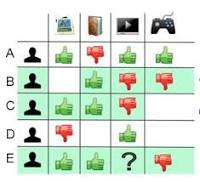

In [1]:
from pyspark import SparkContext
sc = SparkContext("local", "First App")

In [2]:
sc

<SparkContext master=local appName=First App>

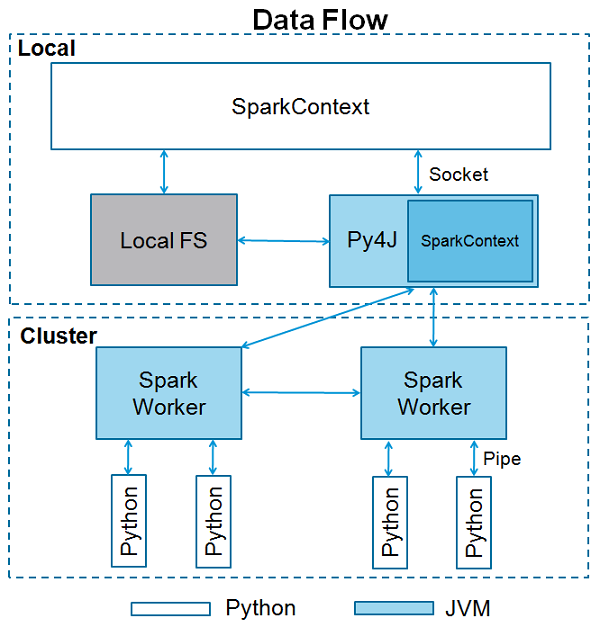

In [14]:
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating

# Load and parse the data
#data = sc.textFile("/home/sushil/spark-2.4.0-bin-hadoop2.7/data/mllib/als/test.data")
#

# Movie recommendations sample
data = sc.textFile("/home/sushil/spark-2.4.0-bin-hadoop2.7/data/mllib/als/sample_movielens_ratings.txt")


In [24]:
type(data)

pyspark.rdd.RDD

In [15]:
# first row
data.first()

'0::2::3::1424380312'

In [30]:
from pyspark import SparkConf
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local").config(conf=SparkConf()).getOrCreate()

df = spark.createDataFrame(data,["userId","movieId","rating","timestamp"])

TypeError: Can not infer schema for type: <class 'str'>

In [19]:
#ratings = data.map(lambda l: l.split(','))\
#    .map(lambda l: Rating(int(l[0]), int(l[1]), float(l[2])))


ratings = data.map(lambda l: l.split('::'))\
    .map(lambda l: Rating(int(l[0]), int(l[1]), float(l[2])))

In [23]:
type(ratings)

pyspark.rdd.PipelinedRDD

In [20]:
# Build the recommendation model using Alternating Least Squares
rank = 10
numIterations = 10
model = ALS.train(ratings, rank, numIterations)

In [18]:
model.productFeatures

<bound method MatrixFactorizationModel.productFeatures of <pyspark.mllib.recommendation.MatrixFactorizationModel object at 0x7f9d086c1d30>>

In [21]:
# Evaluate the model on training data
testdata = ratings.map(lambda p: (p[0], p[1]))
predictions = model.predictAll(testdata).map(lambda r: ((r[0], r[1]), r[2]))
ratesAndPreds = ratings.map(lambda r: ((r[0], r[1]), r[2])).join(predictions)
MSE = ratesAndPreds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error = " + str(MSE))

Mean Squared Error = 0.05205949198756892


In [22]:
# Save and load model
!rm -r myCollaborativeFilter
model.save(sc, "myCollaborativeFilter")
sameModel = MatrixFactorizationModel.load(sc, "myCollaborativeFilter")